# Центральная предельная теорема своими руками
## Показательное (экспоненциальное) распределение
$f(x)=\lambda e^{-\lambda x}$.

Математическое ожидание $1/\lambda$.

Дисперсия $1/\lambda^2$.

Рассмативать будем при $\lambda=1$, 
тогда дисперсия и среднее выборочное совпадают и равны $1$.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

Сгенерируем выборку объёма 1000

In [2]:
r = sts.expon.rvs(size=10000)

Зададим диапазон $x$

In [3]:
x = np.linspace(-4, 5, 1000)

Посторим гистограмму и pdf показательного распределения. И pdf нормального распределения с нашими  $\mu$ и $\sigma$, чтобы сравнить с показательным.

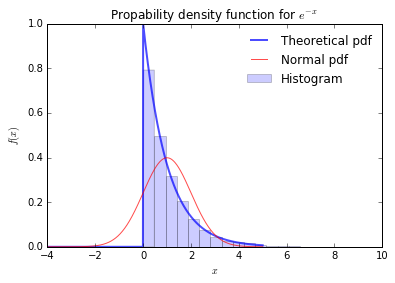

In [4]:
plt.plot(x, sts.expon.pdf(x), 'b', lw=2, alpha=0.7, label='Theoretical pdf')
plt.plot(x, sts.norm(1,1).pdf(x), 'r', lw=1, alpha=0.7, label='Normal pdf')
plt.hist(r,bins=20,  normed=True, alpha=0.2, label='Histogram')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)
plt.title("Propability density function for $e^{-x}$ ")

Зададим параметры нормального распредления $N(\mu ,\sigma ^{2}/n)$.  
$\mu=\sigma^2=1$, тогда   $\sigma = \sqrt{1/n}$

In [5]:
def norm_rv(n):
    return sts.norm(1, np.sqrt(1.0/n)) 

Функция, генерирующая $1000$ выборок объёма $n$

In [6]:
def generate(n, rv, length=1000):
    data = list()
    for i in range(1, length):
        rI = rv.rvs(size=n)
        data.append(np.mean(rI))
    return data

Функция, строящая наши графики.

In [7]:
def plots(n):
    dataMean = generate(n,sts.expon)
    x = np.linspace(min (dataMean) , max(dataMean), 1000) #диапазон x поменяем для налядности графика
    
    dataMeanScatterPlot = pd.DataFrame(dataMean, columns=['Experimental plot'])
    ax = dataMeanScatterPlot.plot(kind='density')

    plt.hist(dataMean,bins=20, normed=True,  alpha=0.2, label='Experimental pdf')
    plt.plot(x, norm_rv(n).pdf(x), 'r', lw=1, alpha=0.7, label='Normal pdf')
    plt.legend(loc='best', frameon=False)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.title("Propability density function for $n=$" +str(n) +" for $e^{-x}$")

Построим графики при различных n.

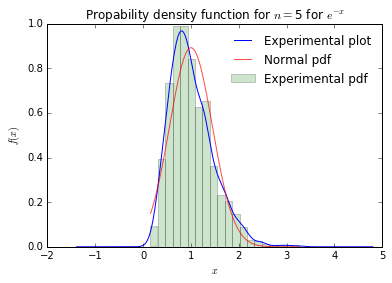

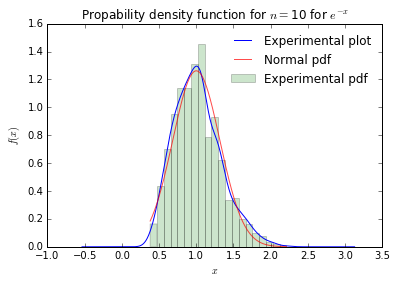

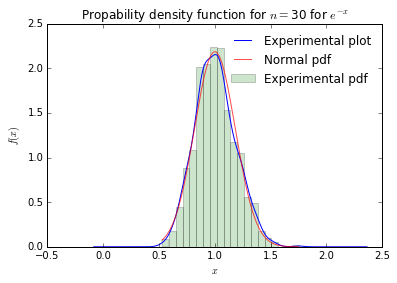

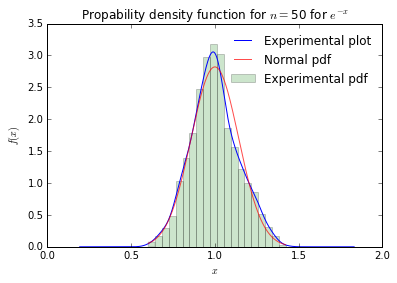

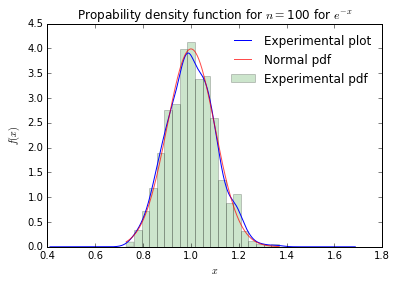

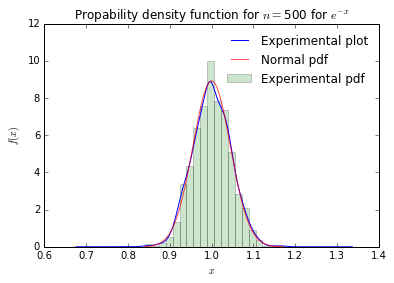

In [8]:
for n in [5,10,30,50,100,500]:
    plots(n)

### Вывод
ЦПТ работает, красота! Распределение выборочных средних случайной величины приближается нормальным распределением в соответствии с центральной предельной теоремой. Точность аппроксимации тем выше, чем больше количество элементов в выборке, т.е. дисперсия уменьшается с увеличением $n$.
